## How optimizers affect the implicit bias
---

In [2]:
from copy import deepcopy
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

import src.finite as finite
import src.infinite as infinite
from src.utils import *

- In this notebook, we explore the various optimizers and see how the choice of optimizers affect the sparsity of solution found.
- Specifically, we use single-neuron as example to do illustration

## Single neuron

In [2]:
target = 'one-neuron'
m = 30
d = 19

gd = infinite.Train(m, d, target=target)
net0 = deepcopy(gd.net)
gd.run(nepochs=50000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50, solver='gd')

[1/50000], 3.1e+00


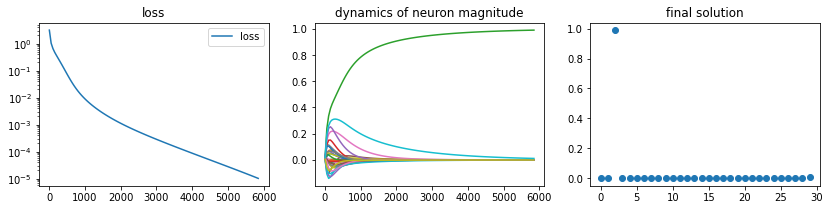

In [27]:
plot_dynamics(gd, label='infinite')

### Momentum GD

- In terms of sparsity and the dynamics behavior, GD and momentum GD are quitely similar.

[1/50000], 3.1e+00


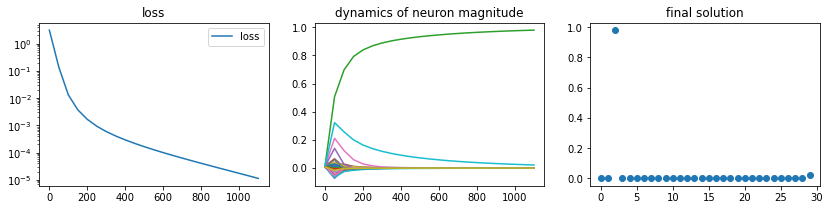

In [30]:
gd_momentum = infinite.Train(m,d, target=target)
gd_momentum.net = deepcopy(net0)
gd_momentum.run(nepochs=50000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50, solver='momentum')
plot_dynamics(gd_momentum, label='infinite')

### Adam
- The adam is still biased to the sparse solution, but extent of sparsity is not as strong as GD and momentum GD

[1/50000], 3.1e+00


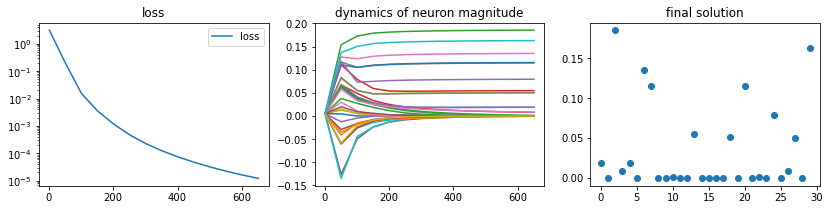

In [29]:
adam = infinite.Train(m,d, target=target)
adam.net = deepcopy(net0)
adam.run(nepochs=50000, learning_rate=5e-3, TOL=1e-5, plot_epoch=2500, check_epoch=50, solver='adam')

plot_dynamics(adam, label='infinite')

---

# Finite-neuron target function

- As experimented in [finite-neuron.py](./finite-neuron.py), the convergence for GD learning finite neuron is pretty slow. 
- It would be interesting to see if Adam and momentum GD can converge faster and preserve the sparsity at the same time.

#### Momentum GD

[1/100000], 1.6e+00


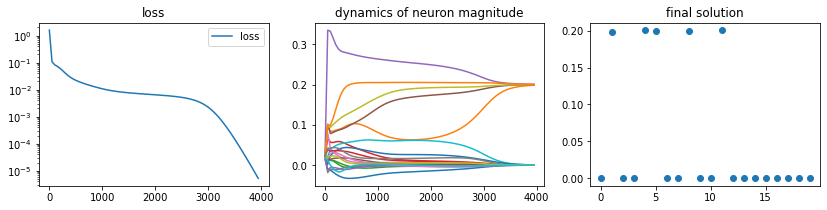

In [3]:
target = 'multi-neuron'
m = 20
d = 19
m_target = 5

momentum = infinite.Train(m, d, target=target, m_target=m_target)
momentum.run(nepochs=100000, learning_rate=1e-2, TOL=5e-6, plot_epoch=10000, check_epoch=50, solver='momentum')
plot_dynamics(momentum, label='infinite')

#### Adam

[1/100000], 1.3e+00


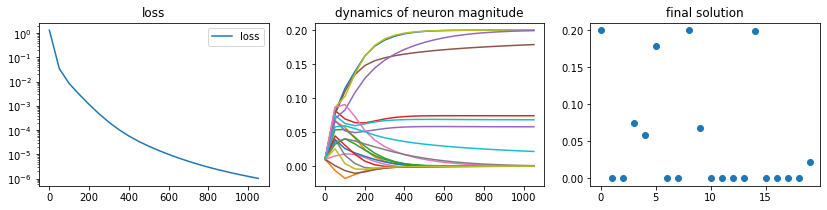

In [36]:
target = 'multi-neuron'
m = 20
d = 19
m_target = 5

adam = infinite.Train(m, d, target=target, m_target=m_target)
adam.run(nepochs=100000, learning_rate=1e-2, TOL=1e-6, plot_epoch=10000, check_epoch=50, solver='adam')
plot_dynamics(adam, label='infinite')

### Finite data results

In [6]:
target = 'multi-neuron'
n = 600
m = 20
d = 19
m_target = 5

nn = finite.Train(m, n, d, target=target, m_target=m_target, save_aB=True)
nn.run(nepochs=100000, learning_rate=1e-2, TOL=1e-7, plot_epoch=10000, check_epoch=50, solver='adam')

0-th iter, loss: 1.9e-01


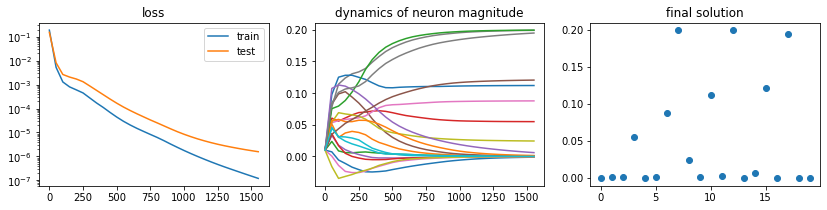

In [7]:
plot_dynamics(nn, label='finite')

---
## Stochastic optimizers

The following experiments show that  replacing the  gradient with a stochastic one does not affect the implicit bias of converging towards sparse solutions. 

#### Stochastic Adam

0-th iter, loss: 6.0e-02


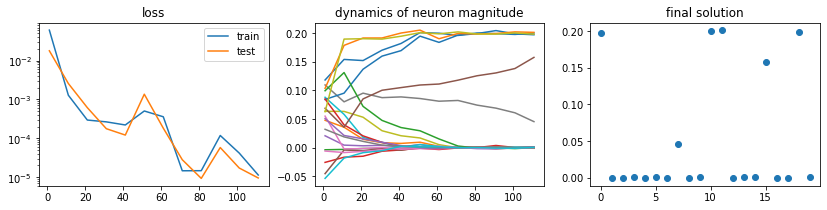

In [32]:
target = 'multi-neuron'
n = 600
m = 20
d = 19
m_target = 5

nn = finite.Train(m, n, d, target=target, m_target=m_target, save_aB=True)
nn.run(nepochs=10000, learning_rate=5e-3, TOL=1e-6, 
       plot_epoch=1000, check_epoch=10, solver='adam', batch_size=5)

plot_dynamics(nn, label='finite')

#### Stochastic GD

In [30]:
target = 'multi-neuron'
n = 600
m = 20
d = 19
m_target = 5

nn = finite.Train(m, n, d, target=target, m_target=m_target, save_aB=True)
nn.run(nepochs=10000, learning_rate=5e-3, TOL=1e-6, 
       plot_epoch=1000, check_epoch=10, solver='gd', batch_size=5)

0-th iter, loss: 7.7e-02
1000-th iter, loss: 2.1e-03
2000-th iter, loss: 1.2e-03
3000-th iter, loss: 2.7e-04
4000-th iter, loss: 8.0e-06


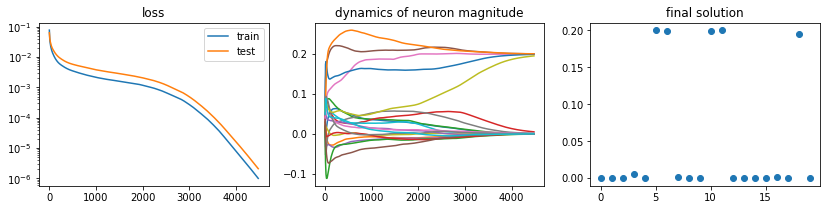

In [31]:
plot_dynamics(nn, label='finite')